# Leon Data Exploration  
Here, I will perform EDA on the lab, microbiology, and prescription tables.  

lab_events and lab_item: lab test done on the patient. 

# Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
import sweetviz as sv
import re

pd.DataFrame.iteritems = pd.DataFrame.items

2023-09-14 09:00:11.047040: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Functions

In [2]:
def plot_vertical_categorical_data(column_name, df, top_n):
    df_counts = df[column_name].value_counts()
    top_X = df_counts.head(top_n)
    
    plt.figure(figsize=(10, 4))
    sns.barplot(x=top_X.index, y=top_X.values)
    plt.title('Top '+str(top_n)+' Most Common ' + column_name)
    plt.xlabel(column_name)
    plt.ylabel('Number of Admissions')
    plt.xticks(rotation=45, ha='right')  # Rotate the diagnosis names for better readability
    plt.tight_layout()
    plt.show()

def plot_horizontal_categorical_data(column_name, df, top_n):
    df_counts = df[column_name].value_counts()
    top_X = df_counts.head(top_n)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x=top_X.values, y=top_X.index)
    plt.title('Top '+str(top_n)+' Most Common ' + column_name)
    plt.ylabel(column_name)
    plt.xlabel('Number of Admissions')
    # You might not need rotation for y-axis labels, but if you do, adjust accordingly
    # plt.yticks(rotation=45, va='center')  
    plt.tight_layout()
    plt.show()
    
# function that performs basic regex operations on column of interest
def basic_regex(df, column_name):  
    df[column_name] = df[column_name].str.replace(',(?!\s)', ', ', regex=True)  # Ensure there's a space following a , for ,s that do not have a space 
    df[column_name] = df[column_name].str.replace('\(\s+', '(', regex=True) # remove one or more spaces that occur following an (
    df[column_name] = df[column_name].str.replace('\s+\)', ')', regex=True) # remove one or more spaces that occur before an )
    df[column_name] = df[column_name].str.replace('\s*/\s*', '/', regex=True)  # remove any spaces that occur directly before/after /
    df[column_name] = df[column_name].str.replace('\s+-\s+', '-', regex=True)  # remove spaces surrounding hyphens 
    df[column_name] = df[column_name].str.replace('-', ' ', regex=True)  # replace hyphens with blank spaces 
    df[column_name] = df[column_name].str.replace('[.;,-?]', '', regex=True).str.strip().str.lower()
    
# function to print the unique combinations of ITEMID and NAME
def itemid_name_unique_values(df, column_itemid, column_desc):
    df_sorted = df.sort_values(by=column_desc, ascending=True)  # sort the df by organism name
    unique_pairs = df_sorted.drop_duplicates(subset=[column_itemid, column_desc])  # drop duplicate rows based on the two columns
    
    # print the unique combinations of ITEMID and NAME
    for _, row in unique_pairs.iterrows():
        print(f"{column_itemid}: {row[column_itemid]}, {column_desc}: {row[column_desc]}")

# MICROBIOLOGY EVENTS

SPEC_ITEMID and ORG_ITEMID should be integer types.

In [229]:
micro = pd.read_csv('/Deep Learning/capstone_project/Data/MICROBIOLOGYEVENTS.csv')
micro['SPEC_ITEMID'] = micro['SPEC_ITEMID'].astype('Int64')
micro['ORG_ITEMID'] = micro['ORG_ITEMID'].astype('Int64')
micro['AB_ITEMID'] = micro['AB_ITEMID'].astype('Int64')
micro.head(10)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
0,744,96,170324,2156-04-13 00:00:00,2156-04-13 14:18:00,70021,BRONCHOALVEOLAR LAVAGE,80026,PSEUDOMONAS AERUGINOSA,1.0,<NA>,NaN,NaN,NaN,NaN,NaN
1,745,96,170324,2156-04-20 00:00:00,2156-04-20 13:10:00,70062,SPUTUM,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
2,746,96,170324,2156-04-20 00:00:00,2156-04-20 16:00:00,70012,BLOOD CULTURE,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
3,747,96,170324,2156-04-20 00:00:00,NaN,70012,BLOOD CULTURE,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
4,748,96,170324,2156-04-20 00:00:00,NaN,70079,URINE,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
5,749,96,170324,2156-04-21 00:00:00,2156-04-21 14:00:00,70062,SPUTUM,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
6,750,101,175533,2196-09-26 00:00:00,NaN,70079,URINE,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
7,751,101,175533,2196-09-27 00:00:00,2196-09-27 00:00:00,70012,BLOOD CULTURE,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
8,752,101,175533,2196-09-27 00:00:00,2196-09-27 00:00:00,70012,BLOOD CULTURE,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN
9,753,101,175533,2196-09-27 00:00:00,2196-09-27 00:00:00,70062,SPUTUM,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN


In [122]:
micro.shape

(631726, 16)

## Missing Values

In [125]:
micro.isnull().sum()

ROW_ID                      0
SUBJECT_ID                  0
HADM_ID                     0
CHARTDATE                   0
CHARTTIME               41772
SPEC_ITEMID                79
SPEC_TYPE_DESC              0
ORG_ITEMID             304845
ORG_NAME               303710
ISOLATE_NUM            303710
AB_ITEMID              355892
AB_NAME                355892
DILUTION_TEXT          364376
DILUTION_COMPARISON    364548
DILUTION_VALUE         364548
INTERPRETATION         355892
dtype: int64

We group the organisms that only occur once intoa  other organisms

## Organism Name (ORG_NAME) and Organism Item ID (ORG_ITEMID)

We can see there is some preliminary text cleaning methods we can implement here, such as removing whitespace before/after text and removing full stops. Consider removing when training initial model as it may be predicting the odds a patient comes to the hospital with a UTI. Some strange micro-organism names to investiage further appear to be 'CANCELLED', and '2ND ISOLATE'. Maybe consider performing word to vec analysis or fuzzywuzzy string similarity to reduce the number of features.  

In [170]:
basic_regex(micro, 'ORG_NAME')  # perform basic data cleaning
micro['ORG_NAME'].fillna('no organism specified', inplace=True)  # not
micro['ORG_NAME'].sort_values().unique()

array(['2nd isolate', 'abiotrophia/granulicatella species',
       'achromobacter (alcaligenes) dentrificans',
       'achromobacter (alcaligenes) xylosoxidans ss dentrificans',
       'acidfast bacilli', 'acinetobacter baumannii',
       'acinetobacter baumannii complex', 'acinetobacter sp',
       'acremonium species', 'actinomyces meyerii',
       'actinomyces odontolyticus', 'actinomycete', 'adenovirus',
       'aerococcus species', 'aerococcus viridans',
       'aeromonas hydrophila', 'aeromonas hydrophilia complex',
       'aeromonas species',
       'afb grown in culture additional information to follow',
       'alcaligenes (achromobacter) species', 'alcaligenes faecalis',
       'alcaligenes xylosoxidans', 'alpha streptococci',
       'anaerobic bacteria', 'anaerobic gram negative rod #2',
       'anaerobic gram negative rod(s)',
       'anaerobic gram positive coccus(i)',
       'anaerobic gram positive rod(s)', 'ascaris lumbricoides',
       'aspergillus flavus', 'aspergillu

In [199]:
itemid_name_unique_values(micro, "ORG_ITEMID", "ORG_NAME")

ORG_ITEMID: 80023, ORG_NAME: staph aureus coag +
ORG_ITEMID: 80155, ORG_NAME: staphylococcus coagulase negative
ORG_ITEMID: 80026, ORG_NAME: pseudomonas aeruginosa
ORG_ITEMID: 80053, ORG_NAME: enterococcus sp
ORG_ITEMID: 80045, ORG_NAME: beta streptococcus group b
ORG_ITEMID: <NA>, ORG_NAME: no organism specified
ORG_ITEMID: 80112, ORG_NAME: bacteroides fragilis group
ORG_ITEMID: 80007, ORG_NAME: enterobacter aerogenes
ORG_ITEMID: 80047, ORG_NAME: beta streptococcus group g
ORG_ITEMID: 80056, ORG_NAME: gram positive rods
ORG_ITEMID: 80071, ORG_NAME: gram negative rod #2
ORG_ITEMID: 80070, ORG_NAME: gram negative rod #1
ORG_ITEMID: 80002, ORG_NAME: escherichia coli
ORG_ITEMID: 80004, ORG_NAME: klebsiella pneumoniae
ORG_ITEMID: 80233, ORG_NAME: presumptive peptostreptococcus species
ORG_ITEMID: 80238, ORG_NAME: clostridium species not c perfringens or c septicum
ORG_ITEMID: 80184, ORG_NAME: enterococcus gallinarum
ORG_ITEMID: 80254, ORG_NAME: candida albicans presumptive identification
O

In [129]:
unique_org_name = micro['ORG_NAME'].value_counts()
unique_org_name.shape
unique_org_name

ORG_NAME
no organism specified                303710
staph aureus coag +                   63947
escherichia coli                      60133
staphylococcus coagulase negative     32777
klebsiella pneumoniae                 30628
                                      ...  
slackia exigua                            1
streptomyces species                      1
campylobacter species                     1
trichosporon asahii                       1
streptococcus mutans                      1
Name: count, Length: 363, dtype: int64

In [102]:
# create a dictionary with key=organism count, value=Number of organisms
count_dic = {}  # create a dictionary storing each of the counts for each micro
for i in range(1, unique_org_name.max()+1):
    count_dic[i] = (unique_org_name == i).sum()

# convert count_dic to a pandas dataframe
org_counts = pd.DataFrame(list(count_dic.items()), columns=['Count', 'Number of Organisms'])

# remove rows where the number of organisms equal zero
org_counts = org_counts[org_counts['Number of Organisms'] != 0]

Below we can see that there are a lot of different organisms that only occur once in the data. From organisms that occur 150 times or more, all counts are just one (i.e there is only one organism tht results in that many counts). If we merge all organisms with unique counts of 10 or less we could simplify the merged dataframe for training.  

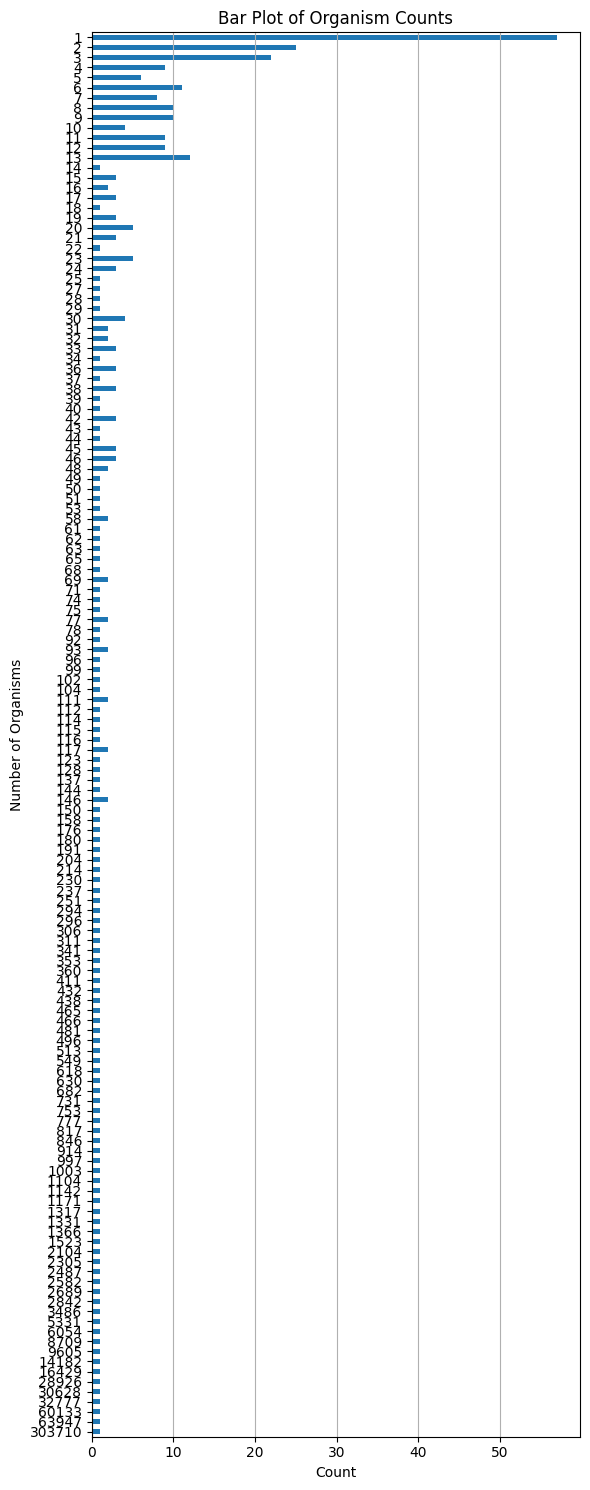

In [27]:
# reverse the order of rows for plotting 
flipped_org_counts = org_counts.iloc[::-1]

# plot a barplot
flipped_org_counts.plot(x='Count', y='Number of Organisms', kind='barh', legend=False)
plt.title('Bar Plot of Organism Counts')
plt.xlabel('Count')
plt.ylabel('Number of Organisms')
plt.grid(axis='x')
plt.xticks(rotation=0)  # Keeping the x-tick labels horizontal
# Increase figure size
plt.gcf().set_size_inches(6, 15)
plt.tight_layout()
plt.show()

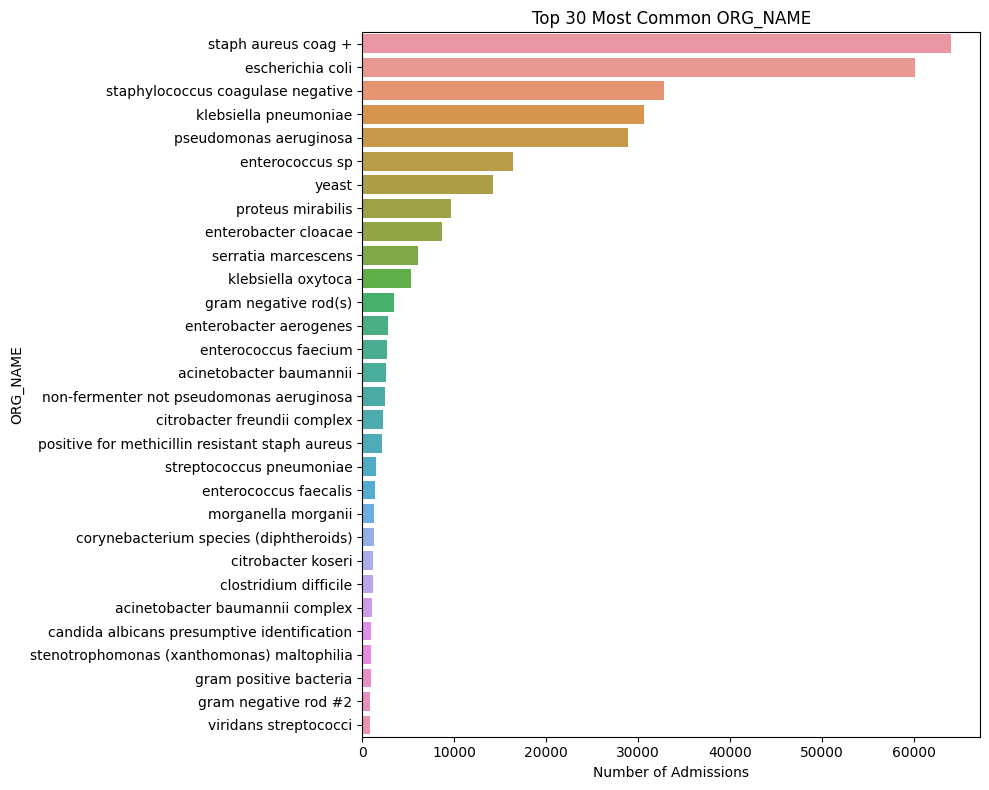

In [74]:
plot_horizontal_categorical_data('ORG_NAME', df=micro, top_n=30)

## Specimen Type Description (SPEC_TYPE_DESC) and SPEC_ITEMID

Column containing information relating to the specimen type. Does not contain any NA values, however, I suspect XXX refers to NA values but should enquire with Shiv about this. 

In [131]:
basic_regex(micro, 'SPEC_TYPE_DESC')  # perform basic regex

# print the values sorted alphabetically
micro['SPEC_TYPE_DESC'].sort_values().unique()

array(['abscess', 'anorectal/vaginal culture', 'arthropod', 'aspirate',
       'bile', 'biopsy', 'blood', 'blood (cmv ab)', 'blood (ebv)',
       'blood (malaria)', 'blood (toxo)', 'blood bag fluid',
       'blood culture', 'blood culture (myco/f lytic bottle)',
       'blood culture (post mortem)', 'blood culture neonate',
       'bone marrow', 'bone marrow cytogenetics', 'bronchial brush',
       'bronchial brush protected', 'bronchial washings',
       'bronchoalveolar lavage', 'c e & a screening', 'catheter tip iv',
       'corneal eye scrapings', 'cre screen', 'csfspinal fluid',
       'dialysis fluid',
       'direct antigen test for herpes simplex virus types 1 & 2',
       'direct antigen test for varicella zoster virus', 'ear', 'eye',
       'fecal swab', 'fluid other',
       'fluid received in blood culture bottles', 'fluid wound',
       'foot culture', 'foreign body', 'gastric aspirate', 'immunology',
       'immunology (cmv)', 'influenza a/b by dfa',
       'influenza a/b

In [200]:
itemid_name_unique_values(micro, "SPEC_ITEMID", "SPEC_TYPE_DESC")

SPEC_ITEMID: 70003, SPEC_TYPE_DESC: abscess
SPEC_ITEMID: 70006, SPEC_TYPE_DESC: anorectal/vaginal culture
SPEC_ITEMID: 70004, SPEC_TYPE_DESC: arthropod
SPEC_ITEMID: 70005, SPEC_TYPE_DESC: aspirate
SPEC_ITEMID: 70009, SPEC_TYPE_DESC: bile
SPEC_ITEMID: 70010, SPEC_TYPE_DESC: biopsy
SPEC_ITEMID: 70015, SPEC_TYPE_DESC: blood
SPEC_ITEMID: 70087, SPEC_TYPE_DESC: blood (cmv ab)
SPEC_ITEMID: 70088, SPEC_TYPE_DESC: blood (ebv)
SPEC_ITEMID: 70032, SPEC_TYPE_DESC: blood (ebv)
SPEC_ITEMID: 70089, SPEC_TYPE_DESC: blood (malaria)
SPEC_ITEMID: 70093, SPEC_TYPE_DESC: blood (toxo)
SPEC_ITEMID: 70007, SPEC_TYPE_DESC: blood bag fluid
SPEC_ITEMID: 70012, SPEC_TYPE_DESC: blood culture
SPEC_ITEMID: 70011, SPEC_TYPE_DESC: blood culture (myco/f lytic bottle)
SPEC_ITEMID: 70016, SPEC_TYPE_DESC: blood culture (post mortem)
SPEC_ITEMID: 70014, SPEC_TYPE_DESC: blood culture neonate
SPEC_ITEMID: 70018, SPEC_TYPE_DESC: bone marrow
SPEC_ITEMID: 70019, SPEC_TYPE_DESC: bone marrow cytogenetics
SPEC_ITEMID: 70020, SPEC

In [133]:
unique_spec_type_desc = micro['SPEC_TYPE_DESC'].value_counts()
unique_spec_type_desc

SPEC_TYPE_DESC
blood culture                       179930
urine                               140671
sputum                               99887
swab                                 37895
mrsa screen                          32280
                                     ...  
post mortem viral culture                1
transtracheal aspirate                   1
blood bag fluid                          1
influenza a/b by dfa bronch wash         1
c e & a screening                        1
Name: count, Length: 87, dtype: int64

There are 87 different types of spec typer desc.  

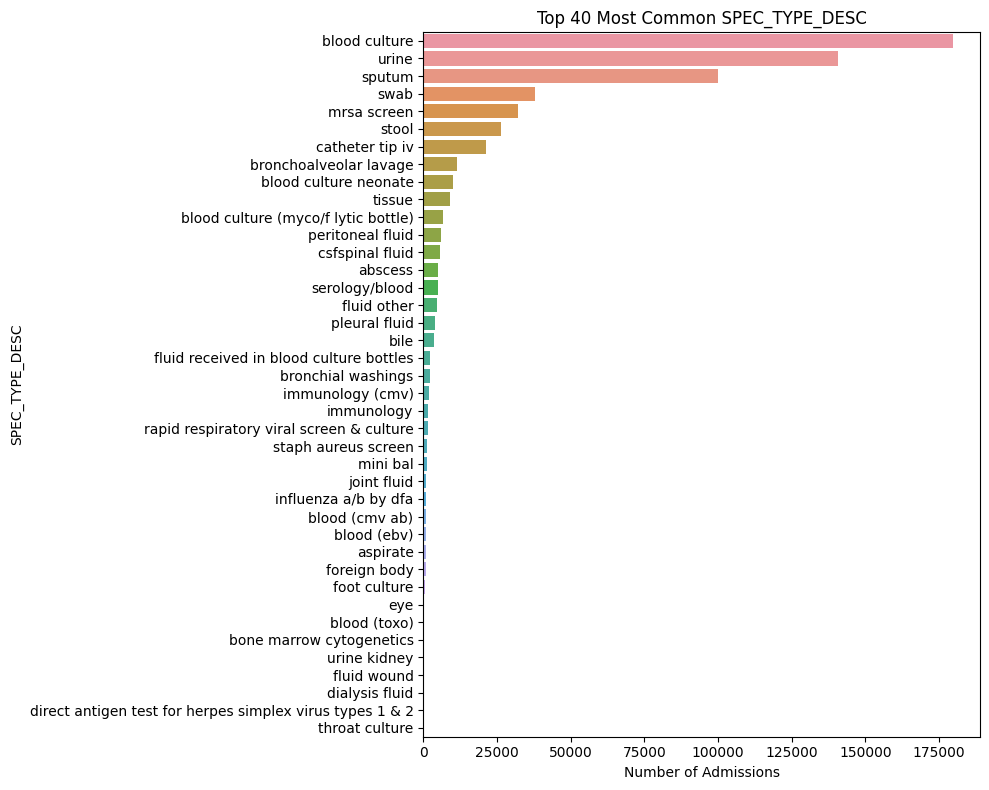

In [134]:
plot_horizontal_categorical_data('SPEC_TYPE_DESC', df=micro, top_n=40)

In [104]:
# create a dictionary with key=organism count, value=Number of organisms
count_dic = {}  # create a dictionary storing each of the counts for each micro
for i in range(1, unique_spec_type_desc.max()+1):
    count_dic[i] = (unique_spec_type_desc == i).sum()

# convert count_dic to a pandas dataframe
spec_type_desc_counts = pd.DataFrame(list(count_dic.items()), columns=['Count', 'Number of Organisms'])

# remove rows where the number of organisms equal zero
spec_type_desc_counts = spec_type_desc_counts[spec_type_desc_counts['Number of Organisms'] != 0]

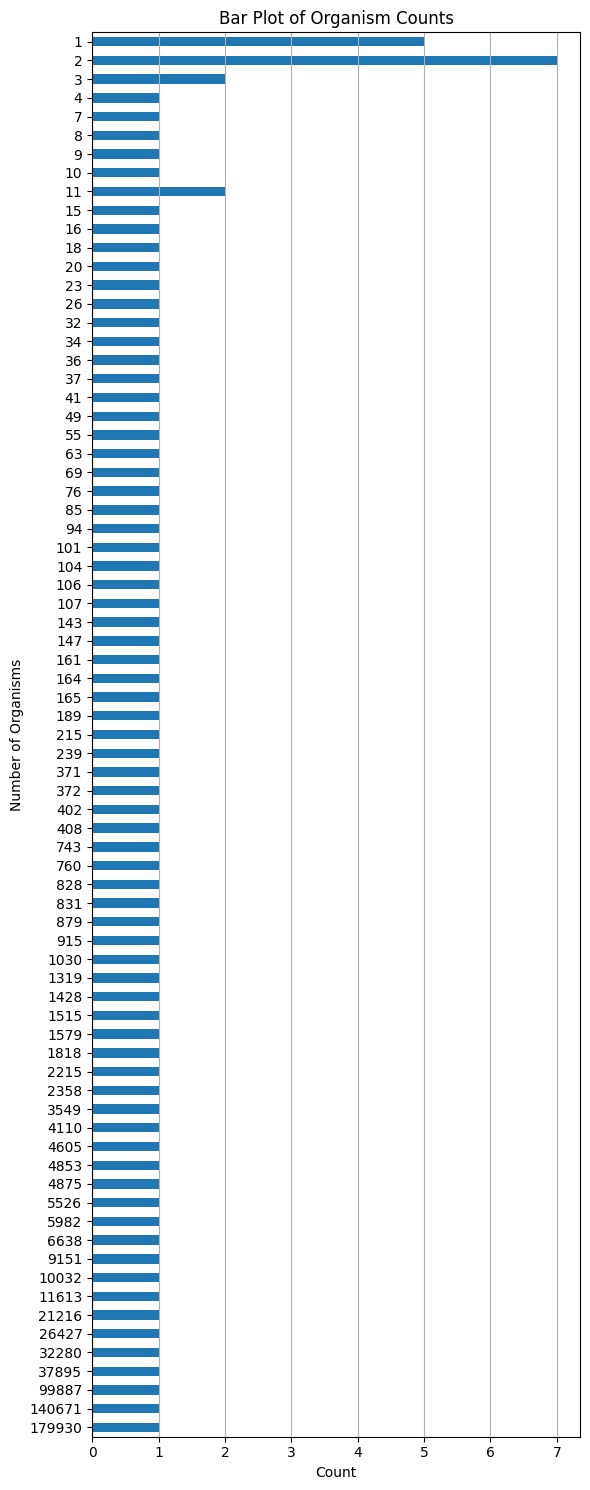

In [105]:
# reverse the order of rows for plotting 
flipped_org_counts = spec_type_desc_counts.iloc[::-1]

# plot a barplot
flipped_org_counts.plot(x='Count', y='Number of Organisms', kind='barh', legend=False)
plt.title('Bar Plot of Organism Counts')
plt.xlabel('Count')
plt.ylabel('Number of Organisms')
plt.grid(axis='x')
plt.xticks(rotation=0)  # Keeping the x-tick labels horizontal
# Increase figure size
plt.gcf().set_size_inches(6, 15)
plt.tight_layout()
plt.show()

## ISOLATE_NUM and ISOLATE_GROUP (new column)
Should be changed to an integer type.  

In [142]:
micro['ISOLATE_NUM'].describe()

count    328016.0
mean     1.098864
std      0.332825
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           6.0
Name: ISOLATE_NUM, dtype: Float64

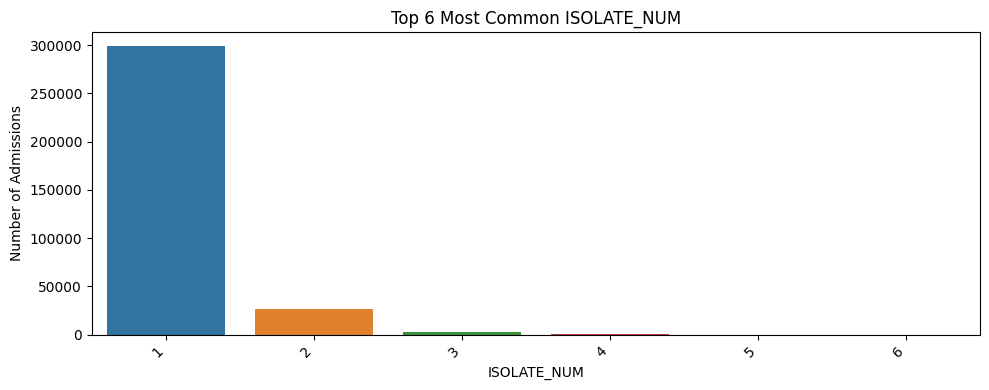

In [148]:
plot_vertical_categorical_data('ISOLATE_NUM', micro, 6)

Majority of the time only one isolate it used. Perhaps it is better to split the groups into two categories where it is 1 isolate or > 1 isolate.

In [221]:
# create a new column splitting the isolate_num into three groups, no_isolate, 1, and > 1
micro['ISOLATE_GROUP'] = np.where(micro['ISOLATE_NUM'].isna(), 'no isolate', np.where(micro['ISOLATE_NUM'] == 1, '1', '>1'))

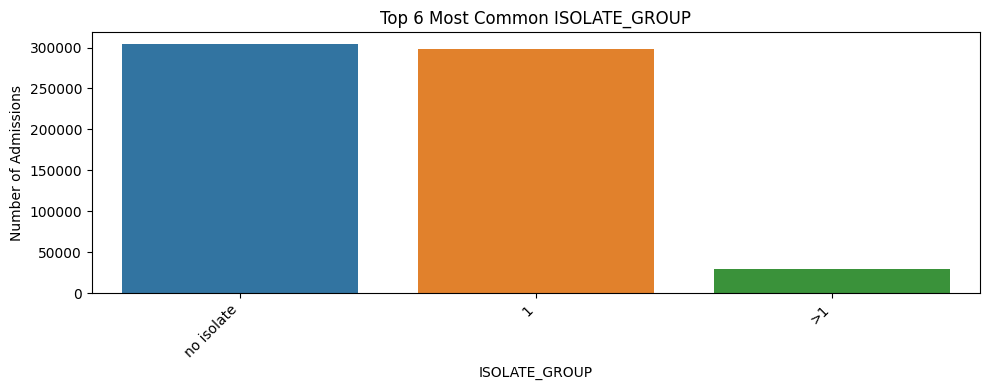

In [222]:
plot_vertical_categorical_data('ISOLATE_GROUP', micro, 6)

## AB_NAME, AB_ITEMID, and INTERPRETATION

S (Susceptible): The bacterial isolate is considered susceptible to the tested antibiotic, meaning the antibiotic is likely effective in inhibiting or killing the bacteria at the recommended dosage.

I (Intermediate): The bacterial isolate shows a response to the antibiotic that is between "susceptible" and "resistant." Clinically, this might suggest that the antibiotic could be effective at higher doses or when concentrations in specific sites are maintained above certain levels. It can also imply that the drug is effective against the tested bacteria in laboratory settings but has not been reliably shown to be effective in clinical treatment.

R (Resistant): The bacterial isolate is resistant to the tested antibiotic, meaning the antibiotic is likely not effective in inhibiting or killing the bacteria.

P: This is less commonly used in standard antibiotic susceptibility tests, but when it does appear, it typically stands for "Pending." This suggests that results are not yet available, or the interpretation is pending further testing or review.  

In [244]:
micro.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION,ISOLATE_GROUP
0,744,96,170324,2156-04-13 00:00:00,2156-04-13 14:18:00,70021,bronchoalveolar lavage,80026,pseudomonas aeruginosa,1.0,<NA>,none,NaN,NaN,NaN,NaN,1
1,745,96,170324,2156-04-20 00:00:00,2156-04-20 13:10:00,70062,sputum,<NA>,no organism specified,NaN,<NA>,none,NaN,NaN,NaN,NaN,no isolate
2,746,96,170324,2156-04-20 00:00:00,2156-04-20 16:00:00,70012,blood culture,<NA>,no organism specified,NaN,<NA>,none,NaN,NaN,NaN,NaN,no isolate
3,747,96,170324,2156-04-20 00:00:00,NaN,70012,blood culture,<NA>,no organism specified,NaN,<NA>,none,NaN,NaN,NaN,NaN,no isolate
4,748,96,170324,2156-04-20 00:00:00,NaN,70079,urine,<NA>,no organism specified,NaN,<NA>,none,NaN,NaN,NaN,NaN,no isolate


In [9]:
micro['AB_NAME'].fillna('no AB', inplace=True)
# perform some basic regex
basic_regex(micro, "AB_NAME")

All antibiotic names correspond to there appropriate antibiotic id's

In [10]:
itemid_name_unique_values(micro, "AB_ITEMID", "AB_NAME")

AB_ITEMID: 90014, AB_NAME: amikacin
AB_ITEMID: 90004, AB_NAME: ampicillin
AB_ITEMID: 90022, AB_NAME: ampicillin/sulbactam
AB_ITEMID: 90005, AB_NAME: cefazolin
AB_ITEMID: 90028, AB_NAME: cefepime
AB_ITEMID: 90024, AB_NAME: cefpodoxime
AB_ITEMID: 90017, AB_NAME: ceftazidime
AB_ITEMID: 90018, AB_NAME: ceftriaxone
AB_ITEMID: 90023, AB_NAME: cefuroxime
AB_ITEMID: 90009, AB_NAME: chloramphenicol
AB_ITEMID: 90019, AB_NAME: ciprofloxacin
AB_ITEMID: 90007, AB_NAME: clindamycin
AB_ITEMID: 90030, AB_NAME: daptomycin
AB_ITEMID: 90006, AB_NAME: erythromycin
AB_ITEMID: 90012, AB_NAME: gentamicin
AB_ITEMID: 90020, AB_NAME: imipenem
AB_ITEMID: 90025, AB_NAME: levofloxacin
AB_ITEMID: 90031, AB_NAME: linezolid
AB_ITEMID: 90029, AB_NAME: meropenem
AB_ITEMID: 90010, AB_NAME: nitrofurantoin
AB_ITEMID: <NA>, AB_NAME: no ab
AB_ITEMID: 90016, AB_NAME: oxacillin
AB_ITEMID: 90002, AB_NAME: penicillin
AB_ITEMID: 90003, AB_NAME: penicillin g
AB_ITEMID: 90021, AB_NAME: piperacillin
AB_ITEMID: 90026, AB_NAME: piper

In [11]:
micro[micro['INTERPRETATION'] == 'P']

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION,ISOLATE_GROUP
56830,58944,4454,141541,2184-09-24 00:00:00,2184-09-24 16:20:00,70079,urine,80026,pseudomonas aeruginosa,1.0,90017,ceftazidime,NaN,NaN,NaN,P,1
57558,58115,4406,193186,2170-03-27 00:00:00,NaN,70062,sputum,80004,klebsiella pneumoniae,1.0,90028,cefepime,NaN,NaN,NaN,P,1
156021,152057,11318,172638,2122-04-05 00:00:00,2122-04-05 10:00:00,70079,urine,80002,escherichia coli,1.0,90010,nitrofurantoin,NaN,NaN,NaN,P,1
287413,281569,21138,109343,2193-05-01 00:00:00,2193-05-01 11:25:00,70064,stool,80023,staph aureus coag +,1.0,90016,oxacillin,NaN,NaN,NaN,P,1
311245,309643,23469,172927,2183-11-23 00:00:00,2183-11-23 18:52:00,70023,catheter tip iv,80004,klebsiella pneumoniae,1.0,90029,meropenem,NaN,NaN,NaN,P,1
330953,332891,25108,116098,2187-12-23 00:00:00,2187-12-23 00:25:00,70079,urine,80004,klebsiella pneumoniae,1.0,90008,trimethoprim/sulfa,NaN,NaN,NaN,P,1
369613,371094,27905,104611,2166-08-02 00:00:00,2166-08-02 00:07:00,70062,sputum,80026,pseudomonas aeruginosa,1.0,90029,meropenem,NaN,NaN,NaN,P,1


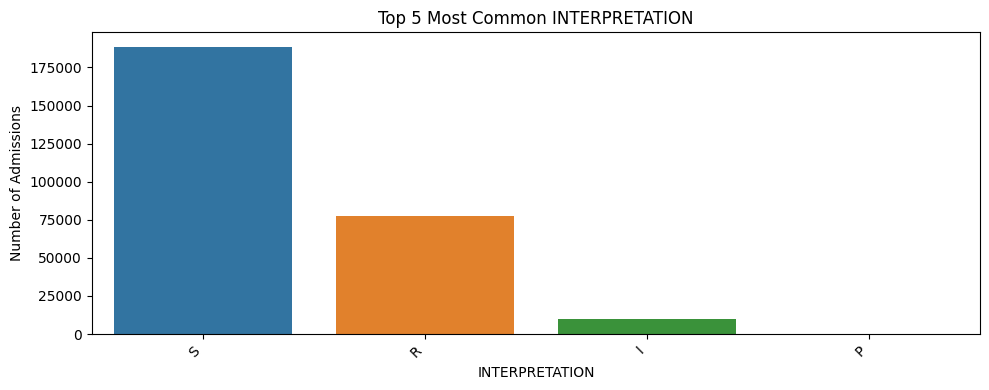

In [12]:
plot_vertical_categorical_data("INTERPRETATION", micro, 5)

## Data Transformations

In [13]:
micro = pd.read_csv('/Deep Learning/capstone_project/Data/MICROBIOLOGYEVENTS.csv')

# convert itemID's to integer values
micro['SPEC_ITEMID'] = micro['SPEC_ITEMID'].astype('Int64')
micro['ORG_ITEMID'] = micro['ORG_ITEMID'].astype('Int64')
micro['AB_ITEMID'] = micro['AB_ITEMID'].astype('Int64')

# perform basic regex
basic_regex(micro, 'ORG_NAME')
basic_regex(micro, 'SPEC_TYPE_DESC')

# deal with na values
micro['ORG_NAME'].fillna('no organism specified', inplace=True)
micro['AB_NAME'].fillna('no AB', inplace=True)
# micro['INTERPRETATION'].fillna('NI', inplace=True)  # make na values equate to NI (No Interpretation)

# create a new column splitting the isolate_num into three groups, no_isolate, 1, and > 1
micro['ISOLATE_GROUP'] = np.where(micro['ISOLATE_NUM'].isna(), 'no isolate', np.where(micro['ISOLATE_NUM'] == 1, '1', '>1'))

## Convert to One-hot vector

In [17]:
micro_filtered = micro[['HADM_ID', 'ORG_NAME', 'SPEC_TYPE_DESC', 'ISOLATE_GROUP', 'AB_NAME', 'INTERPRETATION']]
micro_filtered.head(50)
micro_filtered.shape
# micro_filtered[micro_filtered['HADM_ID'] == 100001]

(631726, 6)

Note: For isolate number it represents the total number of isolates for that hadam id such that:
 - 1: total number of single isolates taken for the hadam_id
 - $>$1: total number of isolates taken more than once for the hadam_id
 - no isolate: total number of number of no isolates taken for the hadam_id likely due to not detecting any microorganisms

In [8]:
micro_oh = pd.get_dummies(micro_filtered, columns=['ORG_NAME', 'SPEC_TYPE_DESC', 'ISOLATE_GROUP', 'AB_NAME', 'INTERPRETATION'], prefix='', prefix_sep='')
micro_onehot = micro_oh.groupby('HADM_ID').sum().reset_index()
micro_onehot

,HADM_ID,2nd isolate,abiotrophia/granulicatella species,achromobacter (alcaligenes) dentrificans,achromobacter (alcaligenes) xylosoxidans ss dentrificans,acidfast bacilli,acinetobacter baumannii,acinetobacter baumannii complex,acinetobacter sp,acremonium species,...,RIFAMPIN,TETRACYCLINE,TOBRAMYCIN,TRIMETHOPRIM/SULFA,VANCOMYCIN,no AB,I,P,R,S
0,100001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
1,100003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,0
2,100006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
3,100007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,0
4,100009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48735,199993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,0
48736,199994,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,13,0,0,5,4
48737,199995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,0,0,0,0
48738,199998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# LABITEMS & LABEVENTS

In [3]:
lab_items = pd.read_csv('/Deep Learning/capstone_project/Data/D_LABITEMS.csv')       # 44K
lab_events = pd.read_csv('/Deep Learning/capstone_project/Data/LABEVENTS.csv')      

In [4]:
# Merge lab_event with lab_item using a left merge
lab_merged = pd.merge(lab_events, lab_items, on='ITEMID', how='left')
lab_merged

,ROW_ID_x,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG,ROW_ID_y,LABEL,FLUID,CATEGORY,LOINC_CODE
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN,21,pH,Blood,Blood Gas,11558-4
1,282,3,NaN,50800,2101-10-12 18:17:00,ART,NaN,NaN,NaN,1,SPECIMEN TYPE,BLOOD,BLOOD GAS,NaN
2,283,3,NaN,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN,3,Base Excess,Blood,Blood Gas,11555-0
3,284,3,NaN,50804,2101-10-12 18:17:00,22,22.00,mEq/L,NaN,5,Calculated Total CO2,Blood,Blood Gas,34728-6
4,285,3,NaN,50808,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal,9,Free Calcium,Blood,Blood Gas,1994-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27854050,27428435,96443,103219.0,50882,2109-12-30 01:40:00,26,26.00,mEq/L,NaN,83,Bicarbonate,Blood,Chemistry,1963-8
27854051,27428436,96443,103219.0,50885,2109-12-30 01:40:00,2.1,2.10,mg/dL,abnormal,86,"Bilirubin, Total",Blood,Chemistry,1975-2
27854052,27428437,96443,103219.0,50902,2109-12-30 01:40:00,97,97.00,mEq/L,NaN,103,Chloride,Blood,Chemistry,2075-0
27854053,27428438,96443,103219.0,50911,2109-12-30 01:40:00,2,2.00,ng/mL,NaN,112,"Creatine Kinase, MB Isoenzyme",Blood,Chemistry,6773-6


In [7]:
lab_merged

,ROW_ID_x,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG,ROW_ID_y,LABEL,FLUID,CATEGORY,LOINC_CODE
0,281,3,NaN,50820,2101-10-12 16:07:00,7.39,7.39,units,NaN,21,pH,Blood,Blood Gas,11558-4
1,282,3,NaN,50800,2101-10-12 18:17:00,ART,NaN,NaN,NaN,1,SPECIMEN TYPE,BLOOD,BLOOD GAS,NaN
2,283,3,NaN,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,NaN,3,Base Excess,Blood,Blood Gas,11555-0
3,284,3,NaN,50804,2101-10-12 18:17:00,22,22.00,mEq/L,NaN,5,Calculated Total CO2,Blood,Blood Gas,34728-6
4,285,3,NaN,50808,2101-10-12 18:17:00,0.93,0.93,mmol/L,abnormal,9,Free Calcium,Blood,Blood Gas,1994-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27854050,27428435,96443,103219.0,50882,2109-12-30 01:40:00,26,26.00,mEq/L,NaN,83,Bicarbonate,Blood,Chemistry,1963-8
27854051,27428436,96443,103219.0,50885,2109-12-30 01:40:00,2.1,2.10,mg/dL,abnormal,86,"Bilirubin, Total",Blood,Chemistry,1975-2
27854052,27428437,96443,103219.0,50902,2109-12-30 01:40:00,97,97.00,mEq/L,NaN,103,Chloride,Blood,Chemistry,2075-0
27854053,27428438,96443,103219.0,50911,2109-12-30 01:40:00,2,2.00,ng/mL,NaN,112,"Creatine Kinase, MB Isoenzyme",Blood,Chemistry,6773-6


## Missing Values

In [6]:
#lab_merged.isnull().sum()
lab_events.isnull().sum()

ROW_ID               0
SUBJECT_ID           0
HADM_ID        5609021
ITEMID               0
CHARTTIME            0
VALUE             1349
VALUENUM       2921220
VALUEUOM       3100249
FLAG          18009889
dtype: int64

## CATEGORY

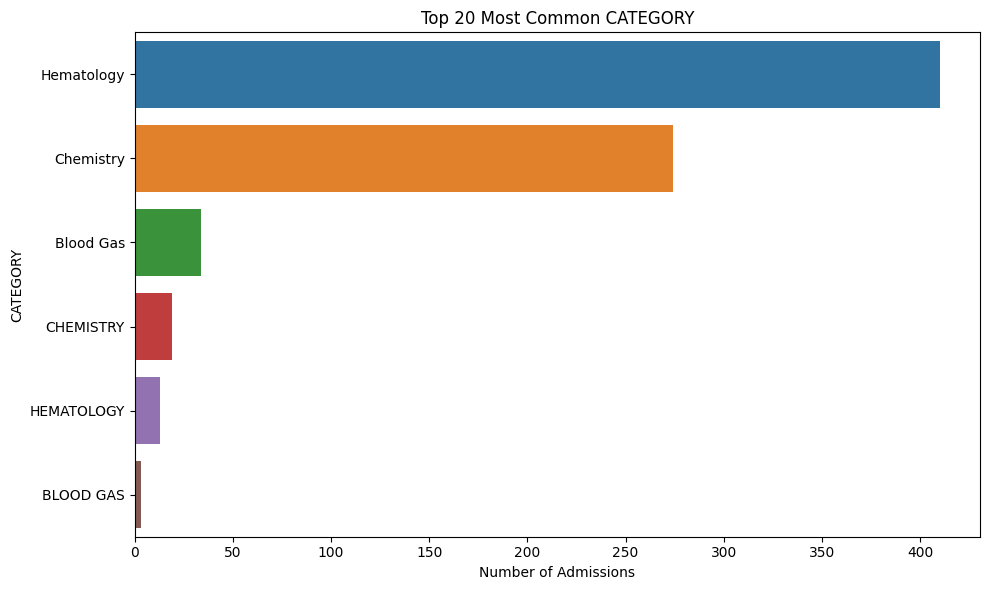

In [99]:
plot_horizontal_categorical_data('CATEGORY', df=lab_items, top_n=20)
#plot_horizontal_categorical_data('SPEC_TYPE_DESC', df=micro, top_n=20)

In [100]:
# Merge lab_event with lab_item using a left merge
lab_merged = pd.merge(lab_event, lab_item, on='ITEMID', how='left')
lab_merged

NameError: name 'lab_event' is not defined

# Medications  

Three tables contain information on medication:  
1) PRESCRIPTIONS
2) INPUTEVENTS_CV
3) INPUTEVENTS_MV

# Prescriptions  

Medication related order entries. 
Drug names, NDC code (11digit version).  
- National Drug Code (NDC) is originally 10-digit, 3 segment numeric identifier.

One hot encode for each drug with the drug concentration as the value.  

In [58]:
prescriptions = pd.read_csv('/Deep Learning/capstone_project/Data/PRESCRIPTIONS.csv', low_memory=False) 

## Missing Values

In [26]:
prescriptions.isnull().sum()

ROW_ID                     0
SUBJECT_ID                 0
HADM_ID                    0
ICUSTAY_ID           1447708
STARTDATE               3182
ENDDATE                 5421
DRUG_TYPE                  0
DRUG                       0
DRUG_NAME_POE        1664234
DRUG_NAME_GENERIC    1662989
FORMULARY_DRUG_CD       1933
GSN                   507164
NDC                     4463
PROD_STRENGTH           1362
DOSE_VAL_RX             1350
DOSE_UNIT_RX            1342
FORM_VAL_DISP           1355
FORM_UNIT_DISP          1409
ROUTE                   1156
dtype: int64

In [27]:
prescriptions

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
0,2214776,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Tacrolimus,Tacrolimus,Tacrolimus,TACR1,021796,4.690617e+08,1mg Capsule,2,mg,2,CAP,PO
1,2214775,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Warfarin,Warfarin,Warfarin,WARF5,006562,5.601728e+07,5mg Tablet,5,mg,1,TAB,PO
2,2215524,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Heparin Sodium,NaN,NaN,HEPAPREMIX,006522,3.380550e+08,"25,000 unit Premix Bag","25,000",UNIT,1,BAG,IV
3,2216265,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,BASE,D5W,NaN,NaN,HEPBASE,NaN,0.000000e+00,HEPARIN BASE,250,ml,250,ml,IV
4,2214773,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Furosemide,Furosemide,Furosemide,FURO20,008208,5.482972e+07,20mg Tablet,20,mg,1,TAB,PO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156445,3996662,98887,121032,238144.0,2144-09-06 00:00:00,2144-09-06 00:00:00,MAIN,PredniSONE,PredniSONE,PredniSONE,PRED20,006751,5.400182e+07,20 mg Tablet,40,mg,2,TAB,PO/NG
4156446,3996070,98887,121032,238144.0,2144-09-06 00:00:00,2144-09-06 00:00:00,MAIN,Ipratropium Bromide Neb,Ipratropium Bromide Neb,Ipratropium Bromide Neb,IPRA2H,021700,4.879801e+08,2.5mL Vial,1,NEB,1,VIAL,IH
4156447,3996063,98887,121032,238144.0,2144-09-06 00:00:00,2144-09-06 00:00:00,MAIN,HYDROmorphone (Dilaudid),HYDROmorphone (Dilaudid),HYDROmorphone,HYDR20/100NS,048078,6.155302e+10,20 mg / 100 mL Premix Bag,0.12,mg,0.01,BAG,IVPCA
4156448,3996062,98887,121032,238144.0,2144-09-06 00:00:00,2144-09-06 00:00:00,MAIN,Docusate Sodium,Docusate Sodium,Docusate Sodium,DOCU100,003009,9.042245e+08,100mg Capsule,100,mg,1,CAP,PO


## DRUG_TYPE 

Contains no mission values.

In [32]:
prescriptions['DRUG_TYPE'].sort_values().unique()

array(['ADDITIVE', 'BASE', 'MAIN'], dtype=object)

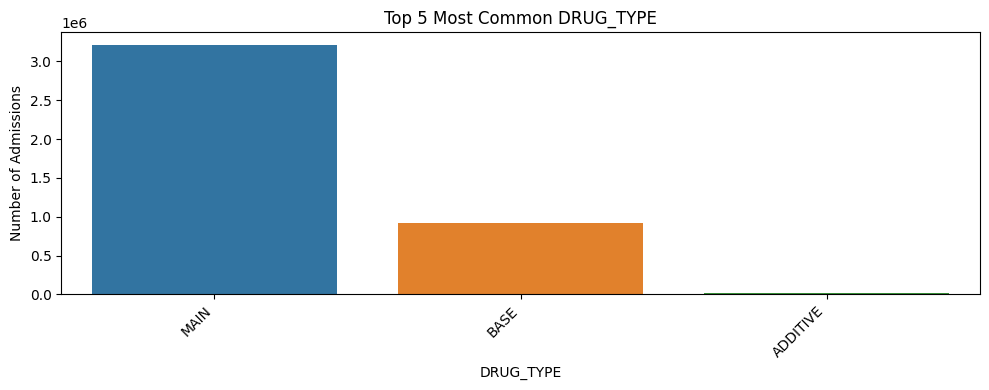

In [35]:
plot_vertical_categorical_data('DRUG_TYPE', df=prescriptions, top_n=5)

## ROUTE
Look's important for determine possible hospital acqiuired complications assosciated with drug admission. Has 1156 missing values. Here is a gpt summary of each of the groups:

1. **AD**: Auditory - into the ear canal.
2. **AERO**: Aerosolized or by air - usually inhaled.
3. **AS**: Left ear (Auris Sinistra in Latin).
4. **AU**: Both ears (Auris Utraque in Latin).
5. **AXILLARY**: Into the axilla or armpit area.
6. **BOTH EARS**: Administered into both ears.
7. **BOTH EYES**: Administered into both eyes.
8. **BU**: Bucal - along the cheek, potentially for absorption through the inner lining of the cheek.
9. **BUCCAL**: Along the cheek, typically between the gum and the cheek for absorption.
10. **DIALYS**: During dialysis - direct administration into the dialysis solution or apparatus.
11. **DWELL**: Remains in place for a period before being removed or drained.
12. **ED**: Epidural - into the epidural space of the spinal cord.
13. **ENTERAL TUBE ONLY ? NOT ORAL**: Administered through a tube leading to the stomach or intestine, not taken by mouth.
14. **ET**: Endotracheal - directly into the trachea.
15. **EX-VIVO**: Outside of a living organism, typically referring to drug treatments applied to organs or tissues outside of the body.
16. **G TUBE**: Gastric tube - directly into the stomach via a tube.
17. **IA**: Intra-arterial - into an artery.
18. **IC**: Intracardiac - into the heart.
19. **ID**: Intradermal - into the skin.
20. **IH**: Inhalation.
21. **IJ**: Intrajugular - into the jugular vein.
22. **IM**: Intramuscular - into a muscle.
23. **IN**: Intranasal - into the nose.
24. **INHALATION**: Taken in by breathing.
25. **INTERSPACE**: Between anatomical spaces.
26. **INTRAPERICARDIAL**: Into the pericardial space around the heart.
27. **IO**: Intraosseous - into the bone marrow.
28. **IP**: Intraperitoneal - into the peritoneal cavity.
29. **IR**: Intrarectal - into the rectum.
30. **IRR**: Irrigation - to rinse or wash out a body cavity or wound.
31. **IT**: Intrathecal - into the spinal canal.
32. **IV**: Intravenous - into a vein.
33. **IV BOLUS**: A rapid IV injection.
34. **IV DRIP**: Slow IV administration over time.
35. **IVPCA**: Intravenous patient-controlled analgesia.
36. **IVS**: Intravenous solution.
37. **IVT**: Intraventricular - into a cardiac ventricle.
38. **J TUBE**: Jejunal tube - into the jejunum part of the intestine.
39. **LEFT EAR**: Administered into the left ear.
40. **LEFT EYE**: Administered into the left eye.
41. **LOCK**: Lock solution, typically an antimicrobial solution left in an intravenous line to prevent infection.
42. **LUMBAR PLEXUS**: Into the lumbar plexus nerve region.
43. **NAS**: Nasal administration.
44. **ND**: Nasoduodenal - into the first part of the small intestine.
45. **NEB**: Nebulized - turned into a fine mist and inhaled.
46. **NG**: Nasogastric - through the nose and into the stomach.
47. **NG/OG**: Nasogastric or orogastric - through the nose or mouth into the stomach.
48. **NS**: Nasal.
49. **NU**: Nebulized.
50. **OD**: Right eye (Oculus Dexter in Latin).
51. **OG**: Orogastric - through the mouth into the stomach.
52. **ORAL**: Taken by mouth.
53. **OS**: Left eye (Oculus Sinister in Latin).
54. **OU**: Both eyes (Oculus Uterque in Latin).
55. **PB**: Peripheral block - anesthetic block of a peripheral nerve.
56. **PERIPHNERVE**: Peripheral nerve.
57. **PL**: Pleural - into the pleural cavity of the lungs.
58. **PO**: By mouth or oral administration.
59. **PO OR ENTERAL TUBE**: By mouth or through an enteral tube.
60. **PO/IV**: Oral or intravenous.
61. **PO/NG**: Oral or nasogastric.
62. **PO/OG**: Oral or orogastric.
63. **PO/PR**: Oral or rectal.
64. **PR**: Per rectum or rectal administration.
65. **RECTAL**: Into the rectum.
66. **REPLACE**: Replacement solution.
67. **RIGHT EAR**: Administered into the right ear.
68. **RIGHT EYE**: Administered into the right eye.
69. **SC**: Subcutaneous - under the skin.
70. **SCPCA**: Subcutaneous patient-controlled analgesia.
71. **SCPUMP**: Subcutaneous pump.
72. **SL**: Sublingual - under the tongue.
73. **SUBCUT**: Subcut

In [59]:
prescriptions['ROUTE'].sort_values().unique()

array(['AD', 'AERO', 'AS', 'AU', 'AXILLARY', 'BOTH EARS', 'BOTH EYES',
       'BU', 'BUCCAL', 'DIALYS', 'DWELL', 'ED',
       'ENTERAL TUBE ONLY ? NOT ORAL', 'ET', 'EX-VIVO', 'G TUBE', 'IA',
       'IC', 'ID', 'IH', 'IJ', 'IM', 'IN', 'INHALATION', 'INTERSPACE',
       'INTRAPERICARDIAL', 'IO', 'IP', 'IR', 'IRR', 'IT', 'IV',
       'IV BOLUS', 'IV DRIP', 'IVPCA', 'IVS', 'IVT', 'J TUBE', 'LEFT EAR',
       'LEFT EYE', 'LOCK', 'LUMBAR PLEXUS', 'NAS', 'ND', 'NEB', 'NG',
       'NG/OG', 'NS', 'NU', 'OD', 'OG', 'ORAL', 'OS', 'OU', 'PB',
       'PERIPHNERVE', 'PL', 'PO', 'PO OR ENTERAL TUBE', 'PO/IV', 'PO/NG',
       'PO/OG', 'PO/PR', 'PR', 'RECTAL', 'REPLACE', 'RIGHT EAR',
       'RIGHT EYE', 'SC', 'SCPCA', 'SCPUMP', 'SL', 'SUBCUT', 'TD', 'TP',
       'TT', 'VG', 'VT', nan], dtype=object)

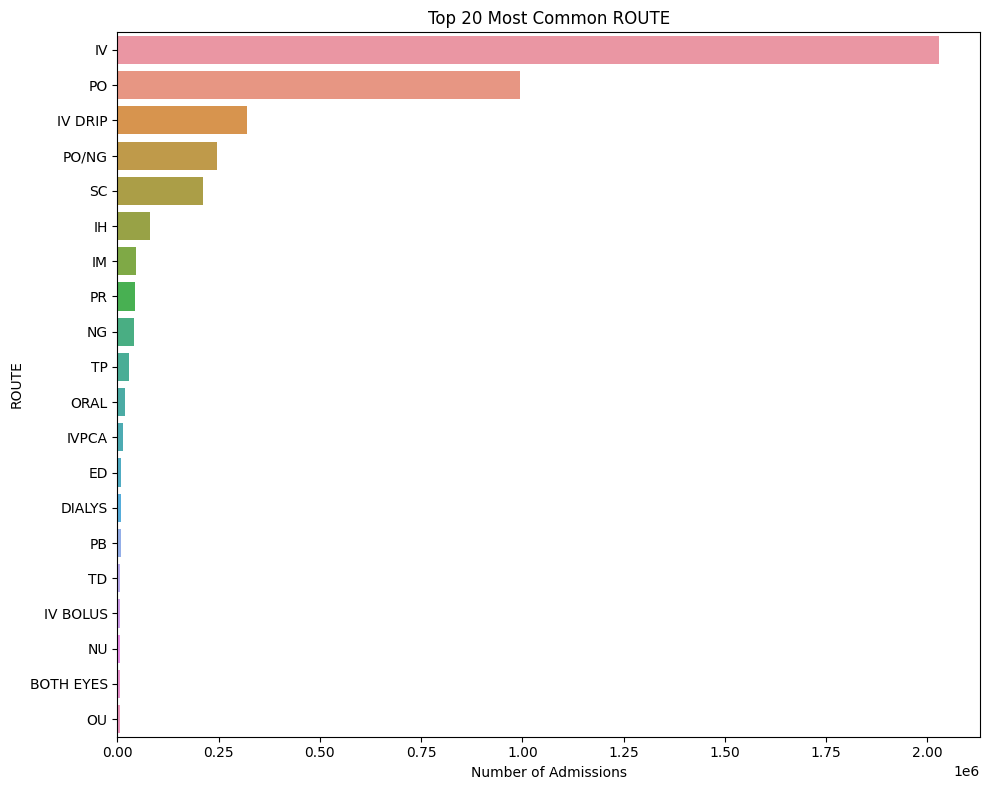

In [60]:
plot_horizontal_categorical_data('ROUTE', df=prescriptions, top_n=20)

We the perform grouping based on chatgpt's response

In [61]:
routes = {
    "Oral and Enteral": [
        "ORAL", "PO", "G TUBE", "J TUBE", "ENTERAL TUBE ONLY ? NOT ORAL",
        "OG", "NG", "NG/OG", "PO OR ENTERAL TUBE", "PO/NG", "PO/OG"],
    
    "Respiratory and Inhalation": [
        "AERO", "IH", "INHALATION", "NEB", "ET", "NU"],
    
    "Ocular and Otic": [
        "AS", "AU", "BOTH EARS", "LEFT EAR", "RIGHT EAR", 
        "OD", "OS", "OU", "BOTH EYES", "LEFT EYE", "RIGHT EYE"],
    
    "Dermal and Transdermal": [
        "ID", "SC", "SUBCUT", "TD", "BUCCAL", "BU", "SL", "AXILLARY"],
    
    "Intravenous and Intramuscular": [
        "IV", "IM", "IV BOLUS", "IV DRIP", "IVPCA", "IJ"],
    
    "Other Invasive Routes": [
        "ED", "IA", "IC", "IT", "IO", "IP", "IR", "IVT", "PR", "INTRAPERICARDIAL"],
    
    "Miscellaneous and Specific Methods": [
        "EX-VIVO", "LOCK", "IRR", "DIALYS", "DWELL"
    ]
}

In [62]:
def categorize_route(route):
    for key, values in routes.items():
        if route in values:
            return key
    return 'Unknown'  # to handle cases not in any of our lists

# Creating a new column 'ROUTE_GROUP' based on the mappings in the dictionary
prescriptions['ROUTE_GROUP'] = prescriptions['ROUTE'].apply(categorize_route)

In [63]:
prescriptions

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE,ROUTE_GROUP
0,2214776,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Tacrolimus,Tacrolimus,Tacrolimus,TACR1,021796,4.690617e+08,1mg Capsule,2,mg,2,CAP,PO,Oral and Enteral
1,2214775,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Warfarin,Warfarin,Warfarin,WARF5,006562,5.601728e+07,5mg Tablet,5,mg,1,TAB,PO,Oral and Enteral
2,2215524,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Heparin Sodium,NaN,NaN,HEPAPREMIX,006522,3.380550e+08,"25,000 unit Premix Bag","25,000",UNIT,1,BAG,IV,Intravenous and Intramuscular
3,2216265,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,BASE,D5W,NaN,NaN,HEPBASE,NaN,0.000000e+00,HEPARIN BASE,250,ml,250,ml,IV,Intravenous and Intramuscular
4,2214773,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Furosemide,Furosemide,Furosemide,FURO20,008208,5.482972e+07,20mg Tablet,20,mg,1,TAB,PO,Oral and Enteral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156445,3996662,98887,121032,238144.0,2144-09-06 00:00:00,2144-09-06 00:00:00,MAIN,PredniSONE,PredniSONE,PredniSONE,PRED20,006751,5.400182e+07,20 mg Tablet,40,mg,2,TAB,PO/NG,Oral and Enteral
4156446,3996070,98887,121032,238144.0,2144-09-06 00:00:00,2144-09-06 00:00:00,MAIN,Ipratropium Bromide Neb,Ipratropium Bromide Neb,Ipratropium Bromide Neb,IPRA2H,021700,4.879801e+08,2.5mL Vial,1,NEB,1,VIAL,IH,Respiratory and Inhalation
4156447,3996063,98887,121032,238144.0,2144-09-06 00:00:00,2144-09-06 00:00:00,MAIN,HYDROmorphone (Dilaudid),HYDROmorphone (Dilaudid),HYDROmorphone,HYDR20/100NS,048078,6.155302e+10,20 mg / 100 mL Premix Bag,0.12,mg,0.01,BAG,IVPCA,Intravenous and Intramuscular
4156448,3996062,98887,121032,238144.0,2144-09-06 00:00:00,2144-09-06 00:00:00,MAIN,Docusate Sodium,Docusate Sodium,Docusate Sodium,DOCU100,003009,9.042245e+08,100mg Capsule,100,mg,1,CAP,PO,Oral and Enteral


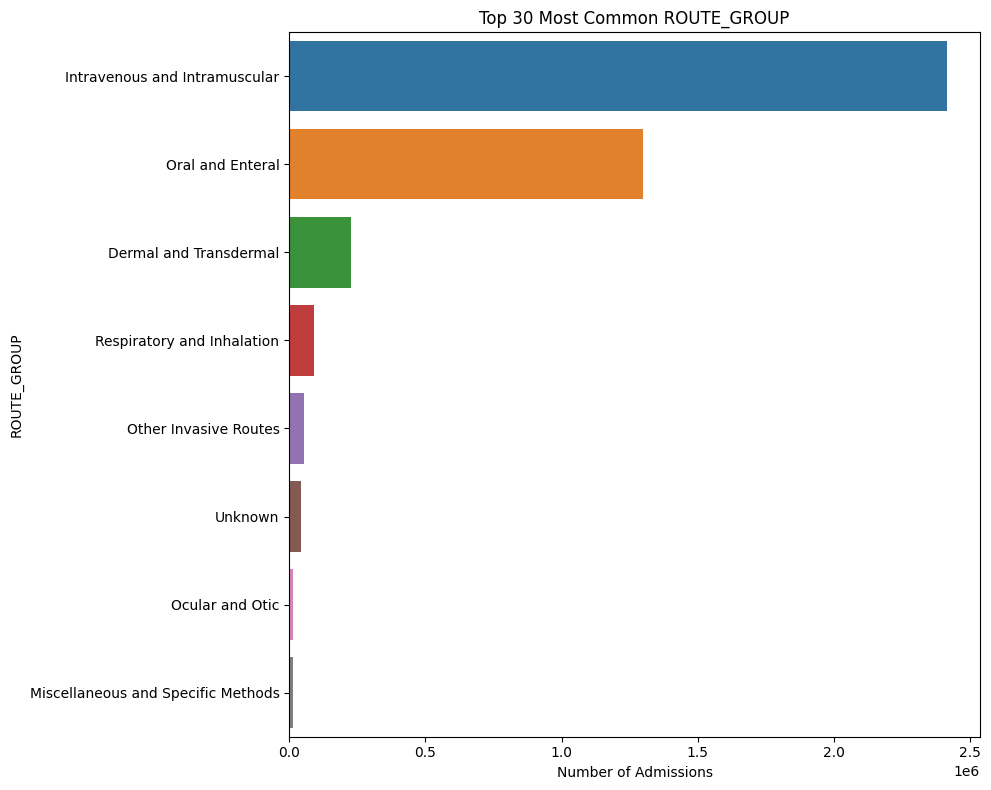

In [64]:
plot_horizontal_categorical_data('ROUTE_GROUP', df=prescriptions, top_n=30)

## DRUG 
No missing values

In [65]:
prescriptions['DRUG'].sort_values().unique()

array([' ', ' Cabergoline     ( Dostinex)', ' Symbicort', ...,
       '~ <IND> Defibrotide', '~<IND> Ketamine/Placebo Study Drug',
       '~<IND> Rituximab'], dtype=object)

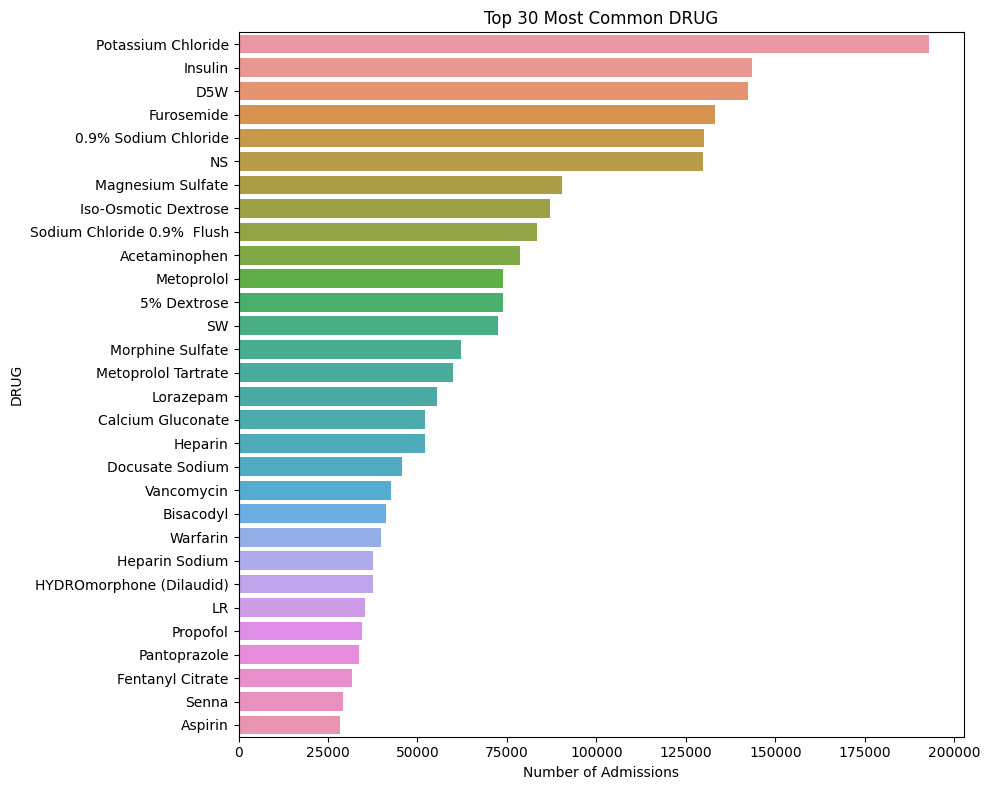

In [29]:
plot_horizontal_categorical_data('DRUG', df=prescriptions, top_n=30)

## Convert to One-hot vector

In [70]:
prescriptions_filtered = prescriptions[['HADM_ID', 'DRUG_TYPE', 'ROUTE_GROUP']]
prescriptions_filtered.shape

(4156450, 3)

In [71]:
prescriptions_filtered

,HADM_ID,DRUG_TYPE,ROUTE_GROUP
0,107064,MAIN,Oral and Enteral
1,107064,MAIN,Oral and Enteral
2,107064,MAIN,Intravenous and Intramuscular
3,107064,BASE,Intravenous and Intramuscular
4,107064,MAIN,Oral and Enteral
...,...,...,...
4156445,121032,MAIN,Oral and Enteral
4156446,121032,MAIN,Respiratory and Inhalation
4156447,121032,MAIN,Intravenous and Intramuscular
4156448,121032,MAIN,Oral and Enteral


In [72]:
prescriptions_oh = pd.get_dummies(prescriptions_filtered, columns=['DRUG_TYPE', 'ROUTE_GROUP'], prefix='', prefix_sep='')
prescriptions_onehot = prescriptions_oh.groupby('HADM_ID').sum().reset_index()
prescriptions_onehot

,HADM_ID,ADDITIVE,BASE,MAIN,Dermal and Transdermal,Intravenous and Intramuscular,Miscellaneous and Specific Methods,Ocular and Otic,Oral and Enteral,Other Invasive Routes,Respiratory and Inhalation,Unknown
0,100001,0,33,59,12,65,0,0,15,0,0,0
1,100003,0,7,22,0,16,0,0,9,0,0,4
2,100006,0,5,70,3,19,0,0,34,0,19,0
3,100007,0,20,64,3,70,0,0,7,2,2,0
4,100009,0,17,105,21,53,0,0,45,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50211,199992,0,10,29,2,21,0,0,13,3,0,0
50212,199993,0,58,139,0,158,0,2,34,2,1,0
50213,199995,0,13,84,1,45,0,0,47,2,0,2
50214,199998,0,14,90,2,51,0,0,48,2,0,1
